In [3]:
# ============================================
# ⚽ Premier League Top Goal Scorer Prediction Model (Gradient Boosting)
# ============================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [4]:
# ============================================
# 2️⃣ Load Dataset
# ============================================

file_path = "/content/newupdatedgoals.csv"  # Update path if needed
df = pd.read_csv(file_path)

print("✅ Data Loaded Successfully")
print("Shape of dataset:", df.shape)
print("\n📄 Sample Data:\n", df.head())


✅ Data Loaded Successfully
Shape of dataset: (324, 20)

📄 Sample Data:
     Season  Rank           Player              Club  Goals  \
0  2023-24     1   Erling Haaland   Manchester City     27   
1  2023-24     2      Cole Palmer           Chelsea     22   
2  2023-24     3   Alexander Isak  Newcastle United     21   
3  2023-24     4    Ollie Watkins       Aston Villa     19   
4  2023-24     4  Dominic Solanke   AFC Bournemouth     19   

               Position  Age  Appearances  Minutes_Played  Goals_prev_season  \
0               Forward   23           31            2682                 36   
1  Attacking Midfielder   22           33            2674                  3   
2               Forward   24           30            2403                 10   
3               Forward   28           37            3302                 15   
4               Forward   26           38            3355                  6   

   Assists  Penalty_Goals  Non-Penalty_Goals  Goals_per_90  \
0        6  

In [5]:
# ============================================
# 3️⃣ Data Quality Check
# ============================================

print("\n🔍 Checking Missing Values:\n", df.isnull().sum())

# Fill categorical NaN with mode, numeric with median
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Remove duplicates
df.drop_duplicates(inplace=True)

print("\n✅ Missing values handled successfully")
print("Dataset shape after cleaning:", df.shape)


🔍 Checking Missing Values:
 Season                      0
Rank                        0
Player                      0
Club                        0
Goals                       0
Position                    0
Age                         0
Appearances                 0
Minutes_Played              0
Goals_prev_season           0
Assists                     0
Penalty_Goals               1
Non-Penalty_Goals           0
Goals_per_90                3
Big_6_Club_Feature          0
Club_League_Rank            0
Club_Total_Goals            0
League_Goals_per_Match      0
Games_in_Season             3
Goals_last_3_seasons_avg    0
dtype: int64

✅ Missing values handled successfully
Dataset shape after cleaning: (324, 20)


In [6]:
# ============================================
# 4️⃣ Keep Only Selected Features
# ============================================

selected_features = [
    "Position",
    "Age",
    "Appearances",
    "Minutes_Played",
    "Goals_prev_season",
    "Assists",
    "Goals_per_90",
    "League_Goals_per_Match",
    "Goals_last_3_seasons_avg",
    "Goals"  # Target variable
]

df = df[selected_features]

print("\n✅ Selected Features Kept:")
print(df.columns.tolist())



✅ Selected Features Kept:
['Position', 'Age', 'Appearances', 'Minutes_Played', 'Goals_prev_season', 'Assists', 'Goals_per_90', 'League_Goals_per_Match', 'Goals_last_3_seasons_avg', 'Goals']



📈 Starting EDA...


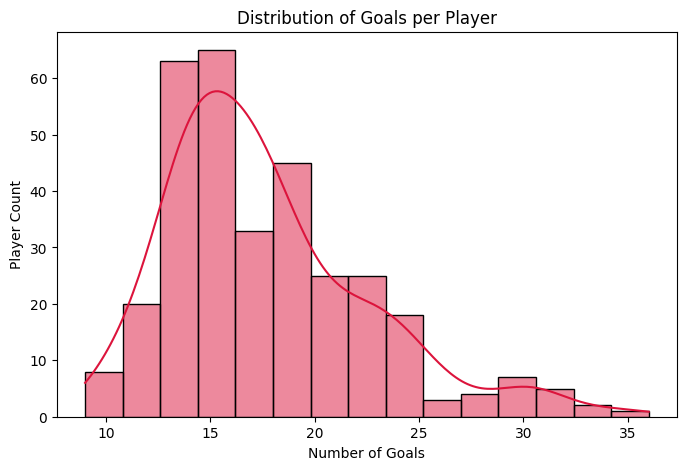

In [7]:
# ============================================
# 5️⃣ Exploratory Data Analysis (EDA)
# ============================================

print("\n📈 Starting EDA...")

# ---- Plot 1: Distribution of Goals ----
plt.figure(figsize=(8,5))
sns.histplot(df["Goals"], kde=True, color="crimson", bins=15)
plt.title("Distribution of Goals per Player")
plt.xlabel("Number of Goals")
plt.ylabel("Player Count")
plt.show()


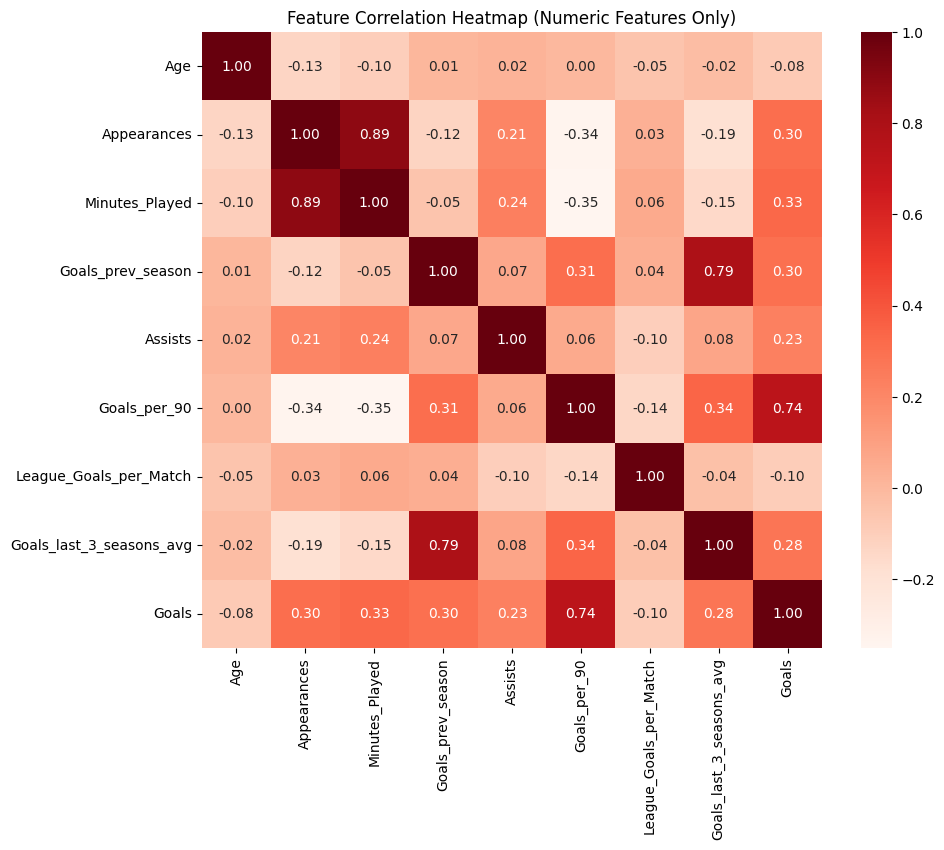

In [8]:
# ---- Plot 2: Correlation Heatmap ----
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f")
plt.title("Feature Correlation Heatmap (Numeric Features Only)")
plt.show()

/tmp/ipython-input-3148839072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Position", y="Goals", data=df, palette="Set2")


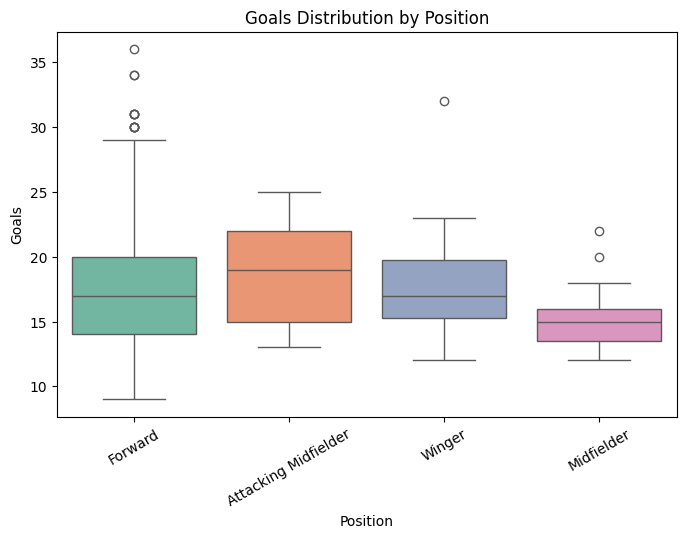


✅ EDA Completed Successfully!


In [9]:
# ---- Plot 3: Goals by Position ----
plt.figure(figsize=(8,5))
sns.boxplot(x="Position", y="Goals", data=df, palette="Set2")
plt.title("Goals Distribution by Position")
plt.xticks(rotation=30)
plt.show()

print("\n✅ EDA Completed Successfully!")


In [10]:
# ============================================
# 6️⃣ Feature Preparation
# ============================================

# Encode categorical column
le = LabelEncoder()
df["Position"] = le.fit_transform(df["Position"])

# Define features and target
X = df.drop("Goals", axis=1)
y = df["Goals"]

# Handle missing values with median imputation
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n🧠 Data Split Done:")
print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)



🧠 Data Split Done:
Train Size: (259, 9)
Test Size: (65, 9)


In [11]:
# ============================================
# 7️⃣ Model Training (Gradient Boosting)
# ============================================

gb = GradientBoostingRegressor(
    n_estimators=200,
    random_state=42,
    learning_rate=0.1,
    max_depth=3
)

gb.fit(X_train, y_train)

print("\n✅ Gradient Boosting Model Training Completed Successfully!")



✅ Gradient Boosting Model Training Completed Successfully!


In [12]:
# ============================================
# 8️⃣ Model Evaluation
# ============================================

y_pred = gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Gradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 0.58
Root Mean Squared Error (RMSE): 0.89
R² Score: 0.96


/tmp/ipython-input-3790484774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


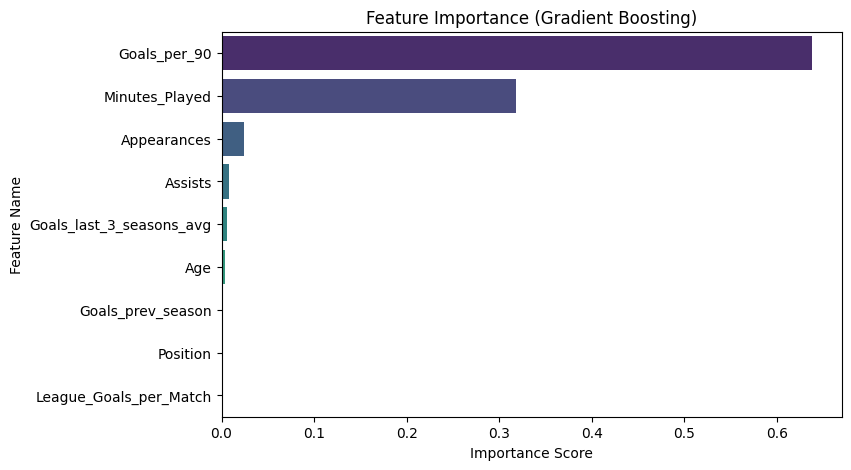


🏁 Analysis Complete – Gradient Boosting Model Training & Evaluation Successful!


In [13]:
# ============================================
# 9️⃣ Feature Importance Visualization
# ============================================

feature_importances = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

print("\n🏁 Analysis Complete – Gradient Boosting Model Training & Evaluation Successful!")